
    # GenSight Prototype

    This notebook demonstrates how to load and analyze daily IT issue tracker data using GenSight. It visualizes daily trends, engineer workload, and common issues using data from `demo_file.xlsx`.
    

In [1]:
# Import necessary modules
import sys
import os
sys.path.append(os.path.abspath('../src'))

import pandas as pd
from data_loader import load_excel_data # type: ignore
from aggregator import generate_summaries # type: ignore
from visualizer import plot_daily_summary, plot_weekly_summary, plot_common_issues, plot_engineer_workload  # type: ignore
from genai_insights import generate_summary_text # type: ignore

    


    ## Load Excel Data

    We load the issue tracker data from the Excel file located in the `sample_data` folder. Each sheet is named by date and contains daily issue records.
    

In [2]:

# Load the Excel data
file_path = '../sample_data/demo_file.xlsx'
df = load_excel_data(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.head()
    

,Associate ID,Associate Name,Location,Issue Description,Ticket number,Status / Remarks,Engineer Name,Additional info,Date
0,2280630,Priyanka Arghode,India,No transcript available,Case 04498032,Case submitted to QDS DAX Support,Jagadish,NaN,2025-08-01
1,2287849,Arunmozhy Mani,India,No transcript available,Case 04498039,Case submitted to QDS DAX Support,Jagadish,NaN,2025-08-01
2,2285926,Victor Babu,India,Unable to use (MFA),NaN,Resolved,Sanjay,NaN,2025-08-04
3,2285926,Victor Babu,India,Tru time issue,NaN,Resolved,Sanjay,NaN,2025-08-04
4,2288719,Praveen PR,India,MFA issue,NaN,Resolved,Sanjay,NaN,2025-08-04



    ## Generate Summaries

    We generate daily, weekly, and monthly summaries, engineer workload distribution, and the top 10 most common issues.
    

In [3]:

# Generate summaries
daily_summary, weekly_summary, monthly_summary, common_issues, engineer_workload = generate_summaries(df)
    


    ## Visualize Data

    We use bar plots to visualize:
    - Daily issue count
    - Weekly issue count
    - Top 10 common issues
    - Engineer workload
    

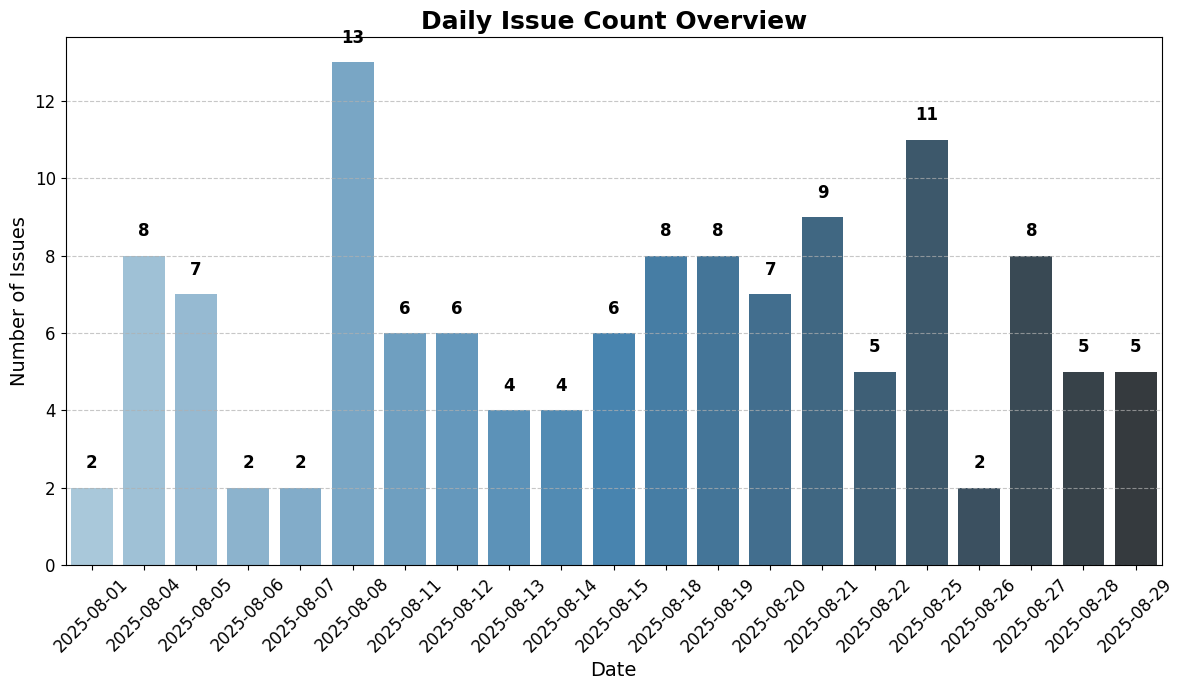

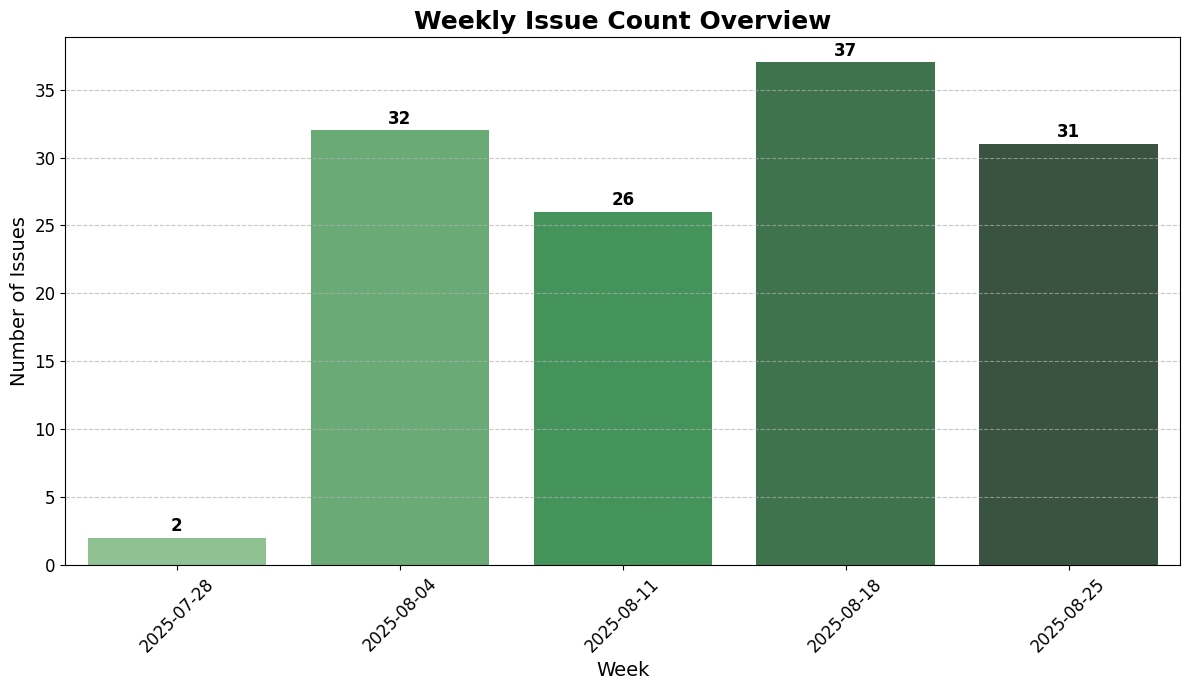

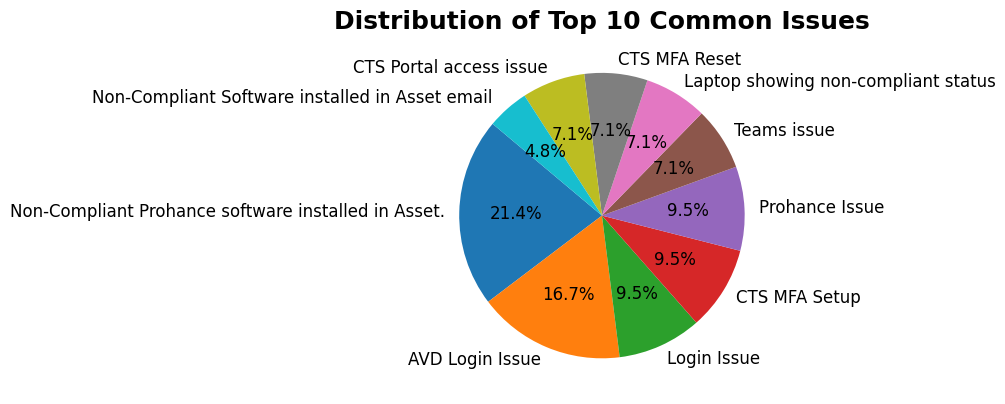

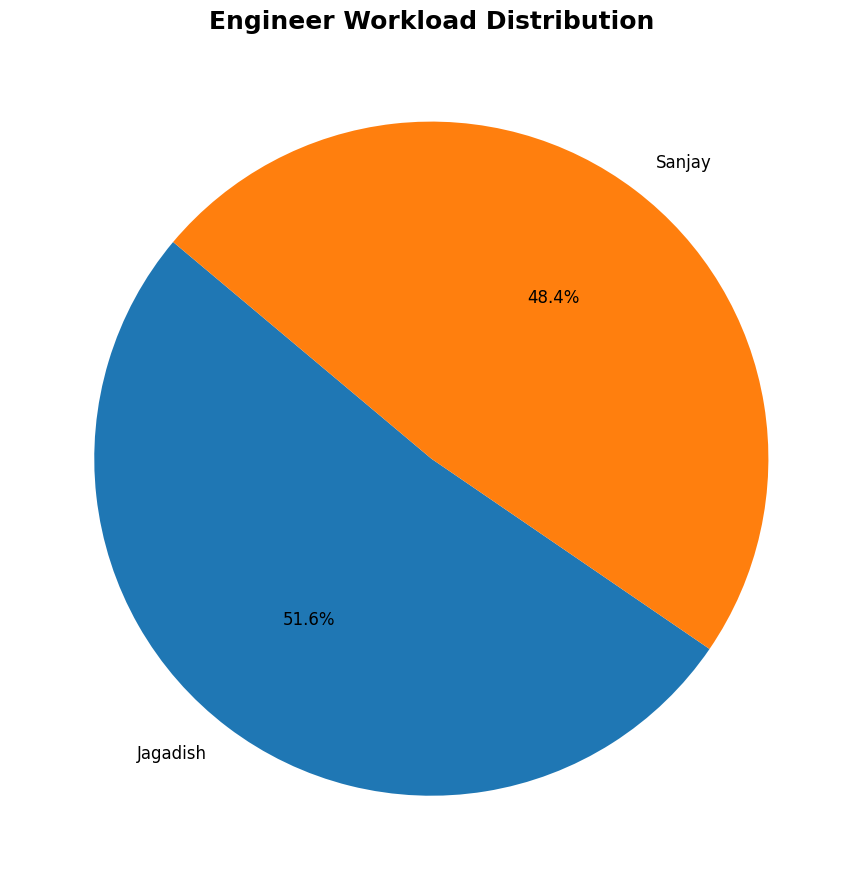

In [4]:

# Visualize the summaries
%matplotlib inline
plot_daily_summary(daily_summary)
plot_weekly_summary(weekly_summary)
plot_common_issues(common_issues)
plot_engineer_workload(engineer_workload)

    


    ## Generate Summary Text

    We use GenAI to generate a natural language summary of the trends and insights from the data.
    

In [5]:

# Generate and display summary text
summary_text = generate_summary_text(daily_summary, weekly_summary, common_issues, engineer_workload)
print(summary_text)
    


## Weekly Operational Summary

This report provides a structured overview of issue trends, recurring challenges, and individual engineer contributions based on the submitted tracker data.

---

### Daily Trends
- **Peak Issue Day:** August 08, 2025 — 13 issues recorded.
- **Average Daily Issues:** 6.1 issues per day.

### Weekly Trends
- **Peak Issue Week:** Commencing August 18, 2025 — 37 issues recorded.
- **Average Weekly Issues:** 25.6 issues per week.

### Common Issues
- **Most Frequently Reported Issue:** Non-Compliant Prohance software installed in Asset. (reported 9 times)

### Engineer Performance
- **Top Performing Engineer:** Jagadish with 66 issues resolved

---

*This summary has been automatically generated by the GenSight platform to support data-driven decision-making and operational transparency.*

